<a href="https://colab.research.google.com/github/lalesafarzade/Recommendation_system_Project/blob/lale/Notebooks/1_vis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from ast import literal_eval
import requests
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline
#from configs import api_key

In [53]:
link_url="https://movielens1.s3.amazonaws.com/links.csv"
movies_ml_25_url="https://movielens1.s3.amazonaws.com/movies.csv"
movie_ml_25_rating_url="https://movielens1.s3.amazonaws.com/ratings.csv"
metadata_updated_url="https://movielens1.s3.amazonaws.com/metadata_updated.json"
metadata_rating_url="https://movielens1.s3.amazonaws.com/ratings.json"

In [4]:
link=pd.read_csv(link_url)
movies_ml_25=pd.read_csv(movies_ml_25_url)
movie_25=pd.merge(movies_ml_25,link,on='movieId')
movie_25.head()

,movieId,title,genres,imdbId,tmdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,113497,8844.0
2,3,Grumpier Old Men (1995),Comedy|Romance,113228,15602.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,114885,31357.0
4,5,Father of the Bride Part II (1995),Comedy,113041,11862.0


In [5]:

json_metadata_updated=pd.read_json(metadata_updated_url, lines=True)

In [10]:
rating_df=pd.read_csv(metadata_rating_url)

In [6]:
def memory_decreaser(df):
    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
                else:
                    if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                        df[col] = df[col].astype(np.float16)
                    elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                        df[col] = df[col].astype(np.float32)
                    else:
                        df[col] = df[col].astype(np.float64)
    #else:
       # df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    
    return df

In [11]:
json_metadata_updated=memory_decreaser(json_metadata_updated)
rating_df=memory_decreaser(rating_df)

Memory usage after optimization is: 3.23 MB
Memory usage after optimization is: 476.84 MB


In [8]:
df=json_metadata_updated[['imdbId','directedBy','starring','avgRating']]
mvielense_df = pd.merge(movie_25, df, on=["imdbId"],how='inner')
mvielense_df.head(2)

,movieId,title,genres,imdbId,tmdbId,directedBy,starring,avgRating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,John Lasseter,"Tim Allen, Tom Hanks, Don Rickles, Jim Varney,...",3.89146
1,2,Jumanji (1995),Adventure|Children|Fantasy,113497,8844.0,Joe Johnston,"Jonathan Hyde, Bradley Pierce, Robin Williams,...",3.26605


In [13]:
df = pd.merge(rating_df,mvielense_df,on='movieId')
df.head(1)

,userId,movieId,rating,timestamp,title,genres,imdbId,tmdbId,directedBy,starring,avgRating
0,1,296,5.0,1147880044,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,110912,680.0,Quentin Tarantino,"John Travolta, Samuel L. Jackson, Tim Roth, Am...",4.1876


In [14]:
import string
result=[]
gnre=df['genres'].to_list()
for i in range(len(gnre)):
  res=gnre[i]
  list_=res.split('|')
  for j in range(len(list_)):
    if not list_[j] in result:
      result.append(list_[j])


In [16]:
def genre_maker(genre,df):
  res=[]
  for i in range(len(df)):
    if genre in df['genres'][i].split('|'):
      res.append(i)
  return df.iloc[res].assign(genres=genre)
Comedy_df=genre_maker('Comedy',mvielense_df)
Crime_df=genre_maker('Crime',mvielense_df)
Drama_df=genre_maker('Drama',mvielense_df)
Thriller_df=genre_maker('Thriller',mvielense_df)
War_df=genre_maker('War',mvielense_df)
Musical_df=genre_maker('Musical',mvielense_df)
Romance_df=genre_maker('Romance',mvielense_df)
Adventure_df=genre_maker('Adventure',mvielense_df)
FilmNoir_df=genre_maker('FilmNoir',mvielense_df)
SciFi_df=genre_maker('SciFi',mvielense_df)
Western_df=genre_maker('Western',mvielense_df)
Fantasy_df=genre_maker('Fantasy',mvielense_df)
Mystery_df=genre_maker('Mystery',mvielense_df)
Children_df=genre_maker('Children',mvielense_df)
Action_df=genre_maker('Action',mvielense_df)
Documentary_df=genre_maker('Documentary',mvielense_df)
Animation_df=genre_maker('Animation',mvielense_df)
Horror_df=genre_maker('Horror',mvielense_df)
IMAX_df=genre_maker('IMAX',mvielense_df)
unknown_df=genre_maker('(no genres listed)',mvielense_df)
unknown_df=unknown_df.assign(genres="NotMentioned")
genre_df=pd.concat([Comedy_df,Crime_df,Drama_df,Thriller_df,War_df,Musical_df,Romance_df,Adventure_df,FilmNoir_df,SciFi_df,Western_df,Fantasy_df,Mystery_df,Children_df,Action_df,Documentary_df,Animation_df,Horror_df,IMAX_df,unknown_df])
#from google.colab import files
#genre_df.to_csv('genre_df.csv',index=False) 
#files.download('genre_df.csv')

## EDA & Visualizing

### Least rated movies

In [17]:
rated_df=df.groupby('title')['rating'].mean().sort_values(ascending=False)
rated_df.tail(20)

title
Roaring Wheels (1970)                                     0.5
Felix, Net i Nika oraz teoretycznie możliwa katastrofa    0.5
Bordering on Bad Behavior (2015)                          0.5
Rich Girl (1991)                                          0.5
Fear Level (2018)                                         0.5
Born Reckless (1958)                                      0.5
Clap, You're Dead (1974)                                  0.5
Mars Needs Women (1967)                                   0.5
Ring of Fire (1961)                                       0.5
Robot Wars (1993)                                         0.5
Facciamo paradiso (1995)                                  0.5
The Ordeal of Patty Hearst (1979)                         0.5
Maria Goretti (2003)                                      0.5
The Operative (2001)                                      0.5
Fair Sex (2012)                                           0.5
Fahim (2019)                                              0.5
Ma

### Most rated movies




In [18]:
rated_df.head(100)

title
Wedding Palace (2013)                                   5.0
Siccîn (2014)                                           5.0
The Fox in the Chicken Coop (1978)                      5.0
The Foursome (2007)                                     5.0
Cedric the Entertainer: Taking You Higher (2006)        5.0
                                                       ... 
Waltz Across Texas (1982)                               5.0
Chavez Cage of Glory (2013)                             5.0
Guidable - The Real History of Ratos de Porão (2008)    5.0
Sing (1989)                                             5.0
Dolls and Angels (2008)                                 5.0
Name: rating, Length: 100, dtype: float64

### Most rated movies based on IMDB


In [20]:
mvielense_df[['avgRating','title']].sort_values(by='avgRating',ascending=False).head(10)

,avgRating,title
42853,5.0,Love Finds You In Sugarcreek (2014)
55735,5.0,Blue (2015)
27260,5.0,Waltz Across Texas (1982)
55693,5.0,"It’s All Right, It’s Ok (2017)"
33752,5.0,Gallows Road (2015)
55653,5.0,Panic (2016)
55651,5.0,Last Hours in Suburbia (2012)
55647,5.0,Cold War (2018)
55621,5.0,Top Secret Rosies: The Female 'Computers' of W...
37488,5.0,Please Kill Mr. Know It All (2013)


#### Most watched rated movies

In [21]:
most_popular_movies=df.groupby('title')['rating'].count().sort_values(ascending=False)
most_popular_movies.head(10)

title
Forrest Gump (1994)                          81491
Shawshank Redemption, The (1994)             81482
Pulp Fiction (1994)                          79672
Silence of the Lambs, The (1991)             74127
Matrix, The (1999)                           72674
Star Wars: Episode IV - A New Hope (1977)    68717
Jurassic Park (1993)                         64144
Schindler's List (1993)                      60411
Braveheart (1995)                            59184
Fight Club (1999)                            58773
Name: rating, dtype: int64

#### Least watched rated movies

In [22]:
least_popular_movies=most_popular_movies.tail(10)
least_popular_movies

title
The Living Idol (1957)                                            1
The Living Magoroku (1943)                                        1
The Living Matrix (2009)                                          1
Kolmistaan (2008)                                                 1
Kokoyakyu: High School Baseball (2006)                            1
Kojot (2017)                                                      1
Kochavva Paulo Ayyappa Coelho (2016)                              1
Knuckleface Jones (1999)                                          1
Knox: The Life and Legacy of Scotland's Controversial Reformer    1
"BLOW THE NIGHT!" Let's Spend the Night Together (1983)           1
Name: rating, dtype: int64

#### Making a Ratings dataframe with average rating and number of ratings:

In [24]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings['num of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings.sort_values(by='num of ratings',ascending=False).head(10)

,rating,num of ratings
title,,
Forrest Gump (1994),4.048011,81491
"Shawshank Redemption, The (1994)",4.413576,81482
Pulp Fiction (1994),4.188912,79672
"Silence of the Lambs, The (1991)",4.151342,74127
"Matrix, The (1999)",4.154099,72674
Star Wars: Episode IV - A New Hope (1977),4.120189,68717
Jurassic Park (1993),3.679175,64144
Schindler's List (1993),4.247579,60411
Braveheart (1995),4.002273,59184


### Visualizing

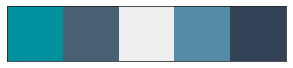

In [46]:
# Set your custom color palette
movies_colors = ["#00909E", "#476072", "#EEEEEE", "#548CA8","#334257"]
sns.set_palette(sns.color_palette(movies_colors))
sns.palplot(movies_colors)

In [27]:
from google.colab import files

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Distribution of Movies genres')

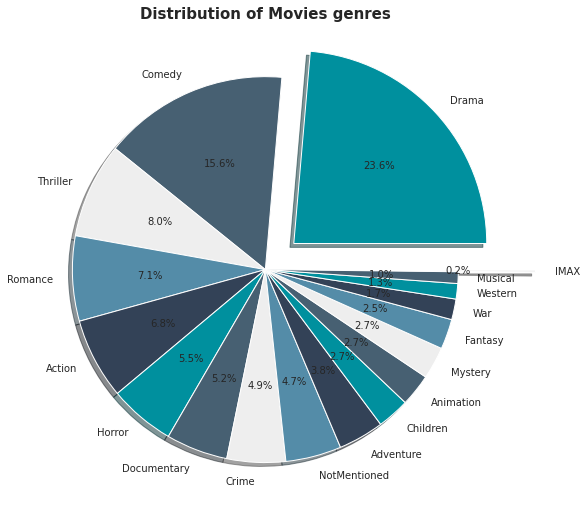

In [47]:
plt.figure(figsize=(20,7))
explode = (0.2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.4)
plt.pie(genre_df['genres'].value_counts(),shadow=True,explode=explode,labels=genre_df['genres'].value_counts().index,autopct="%1.1f%%")
plt.tight_layout()
#plt.axis('equal')
plt.savefig("pie.png")
files.download('pie.png')
plt.title('Distribution of Movies genres',fontsize= 15,pad=10,fontweight="bold")

### Distribution of number of rate based on rate

<Figure size 1440x504 with 0 Axes>

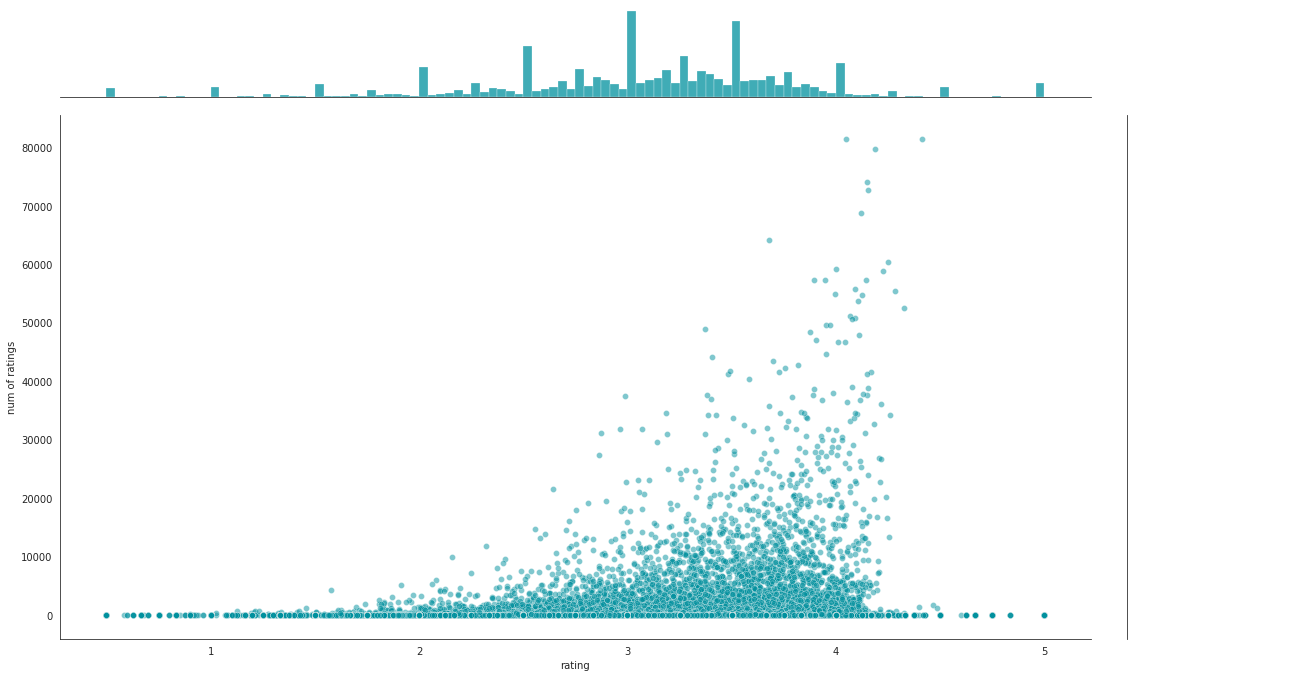

In [52]:
plt.figure(figsize=(20,7))
sns.jointplot(x='rating',y='num of ratings',data=ratings,alpha=0.5)
plt.gcf().set_size_inches(20, 10)

### Distribution of User rating

Text(0.5, 1.0, 'Distribution of User rating')

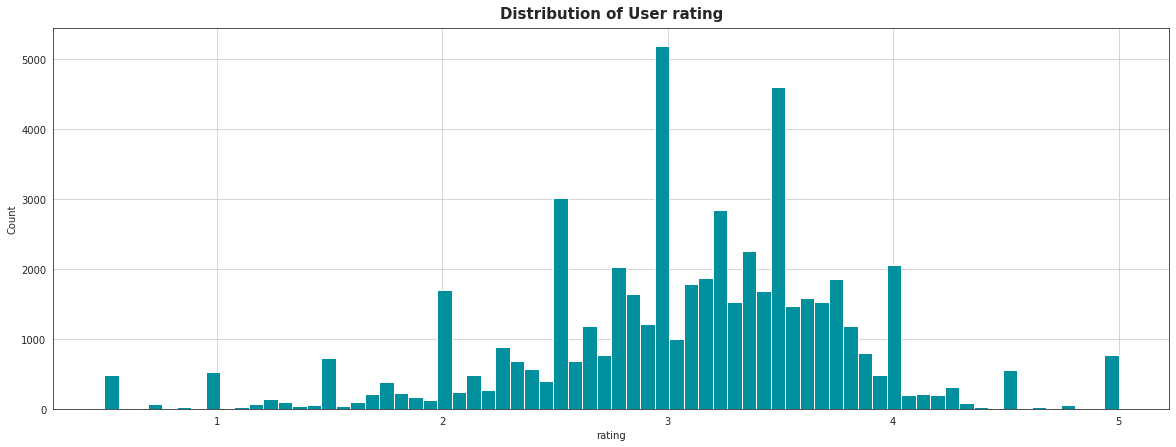

In [ ]:
plt.figure(figsize=(20,7))
ratings['rating'].hist(bins=70)
plt.ylabel("Count")
plt.xlabel("rating")
plt.title('Distribution of User rating',fontsize= 15,pad=10,fontweight="bold")

### Distribution of num of ratings


Text(0.5, 1.0, 'Distribution of num of ratings')

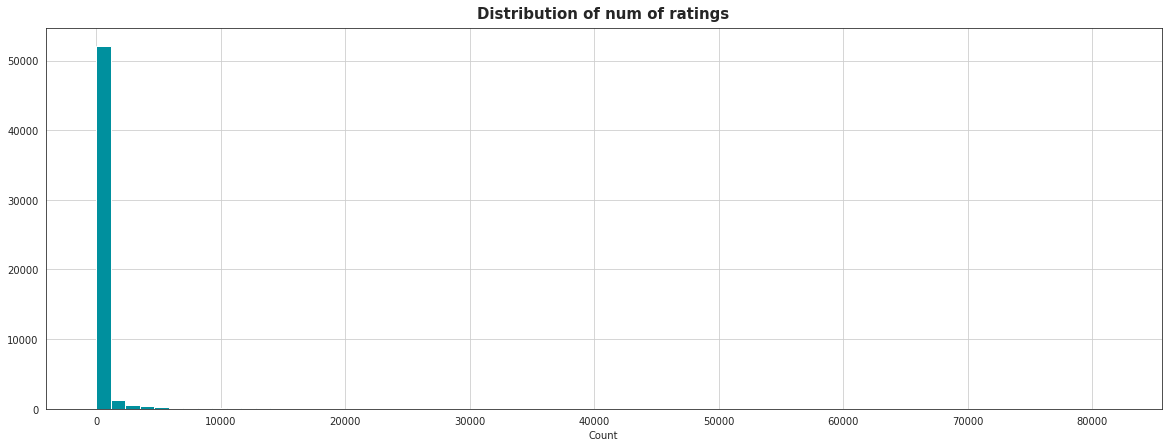

In [ ]:
plt.figure(figsize=(20,7))
ratings['num of ratings'].hist(bins=70)
plt.xlabel("Count")
plt.title('Distribution of num of ratings',fontsize= 15,pad=10,fontweight="bold")

### Distribution of IMDB avg rating versus user rating avg

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Distribution of IMDB avg rating versus user rating avg')

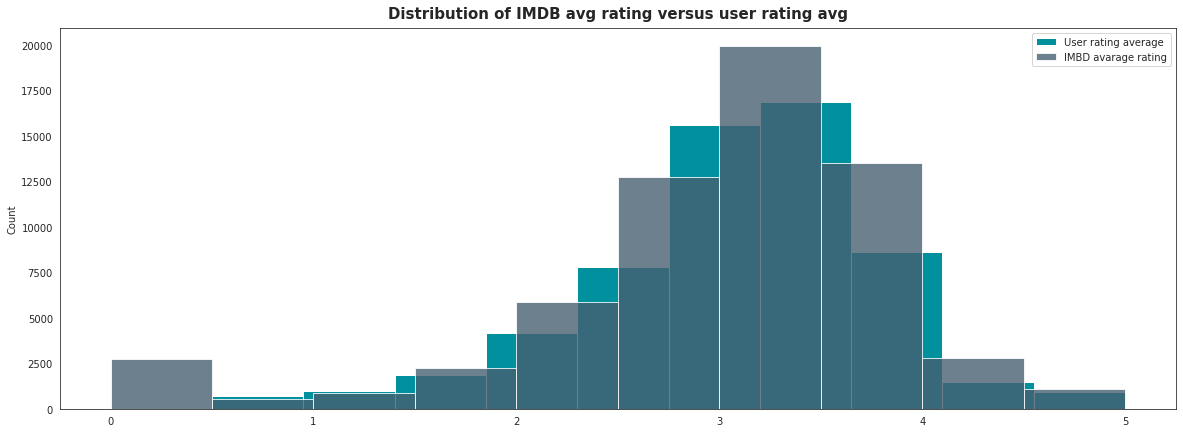

In [48]:
plt.figure(figsize=(20,7))
ratings['rating'].plot(kind='hist',label='User rating average')
mvielense_df['avgRating'].plot(kind='hist',label='IMBD avarage rating',alpha=.8)
plt.legend()
plt.ylabel("Count")
plt.savefig("versus.png")
files.download('versus.png')
plt.title('Distribution of IMDB avg rating versus user rating avg',fontsize= 15,pad=10,fontweight="bold")

### Top 10 Movie Directors with the most movies directing

Text(0.5, 1.0, 'Top 10 Movie Directors with the most movies directing')

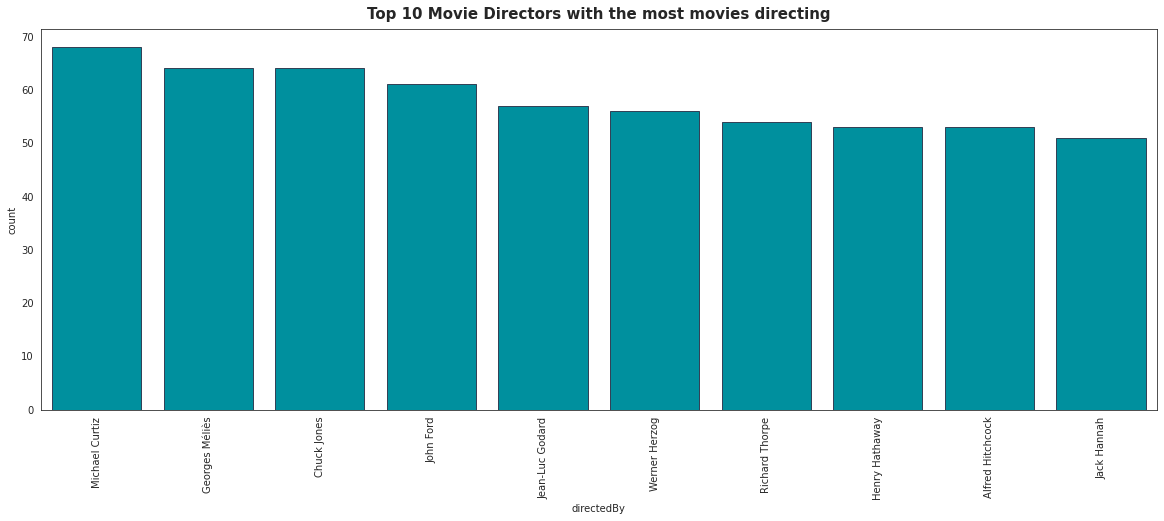

In [45]:
movie_director=mvielense_df['directedBy'].value_counts().head(11).to_dict()
director_ls=[i for i in movie_director]
movie_dir_df=pd.concat([mvielense_df[mvielense_df['directedBy']==i] for i in director_ls[1:]])
plt.figure(figsize=(20,7))
sns.countplot(x='directedBy',data=movie_dir_df,facecolor='#00909E',edgecolor='#334257')
plt.xticks(rotation="vertical")
plt.title('Top 10 Movie Directors with the most movies directing',fontsize= 15,pad=10,fontweight="bold")

### Title wordcloud

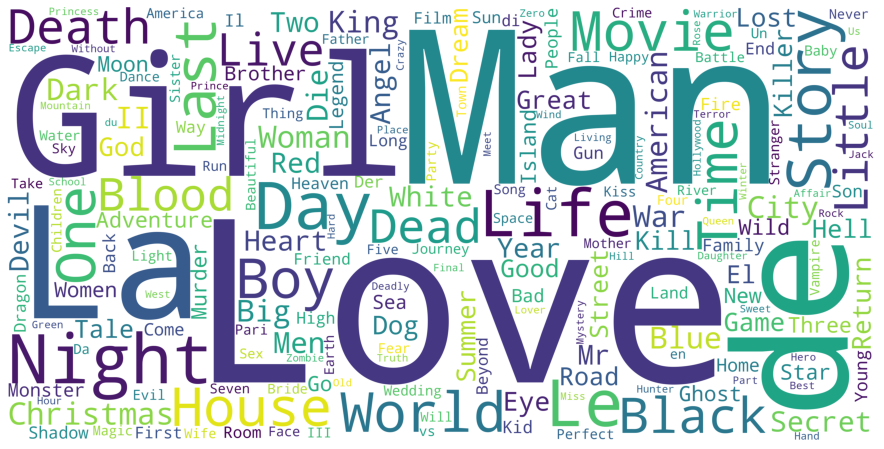

In [33]:
from wordcloud import WordCloud, STOPWORDS
mvielense_df['title'] = mvielense_df['title'].astype('str')
title_corpus = ' '.join(mvielense_df['title'])
overview_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(title_corpus)
plt.figure(figsize=(16,8))
plt.imshow(overview_wordcloud)
plt.axis('off')
plt.savefig("cloud.png")
files.download('cloud.png')
plt.show()

### Genres Wordcloud

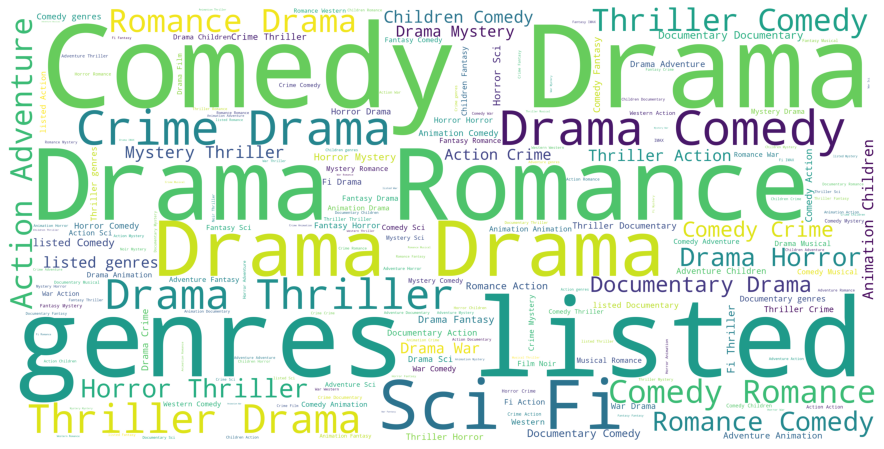

In [49]:
mvielense_df['genres'] = mvielense_df['genres'].astype('str')
genres_corpus = ' '.join(mvielense_df['genres'])
overview_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(genres_corpus)
plt.figure(figsize=(16,8))
plt.imshow(overview_wordcloud)
plt.axis('off')
plt.show()

### Number of movies between 1995_2019

In [35]:
#extract year and title from title column
movie_25 = movie_25.assign(year = lambda x: x['title'].str[-5:-1])
movie_25 = movie_25.assign(title = lambda x: x['title'].str[:-7])
movie_25.head(2)

,movieId,title,genres,imdbId,tmdbId,year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,1995
1,2,Jumanji,Adventure|Children|Fantasy,113497,8844.0,1995


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

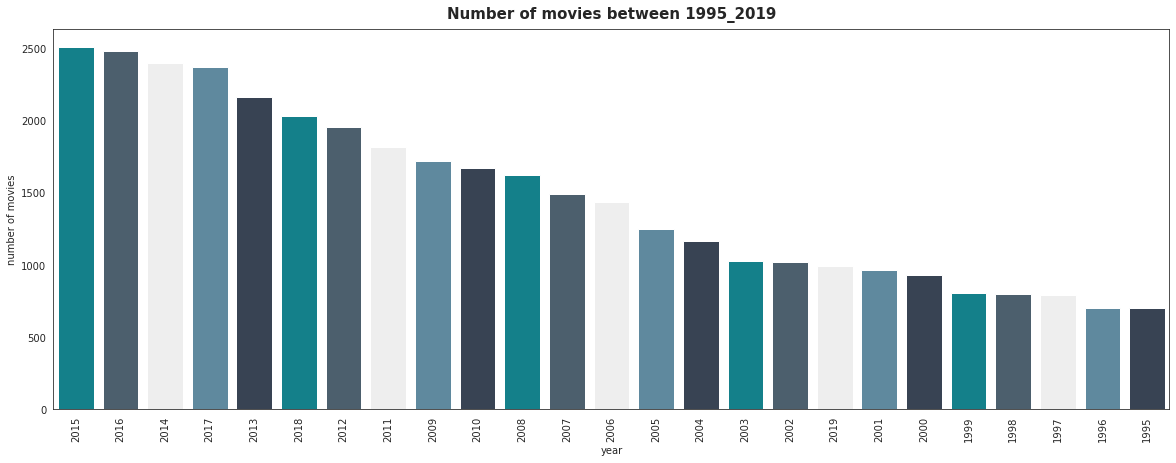

In [51]:
year_df=movie_25['year'].value_counts().head(25).to_frame().reset_index()
year_df.columns=['year','number of movies']
plt.figure(figsize=(20,7))
sns.barplot(x='year',y='number of movies',data=year_df,palette=movies_colors)
plt.xticks(rotation="vertical")
plt.title('Number of movies between 1995_2019',fontsize= 15,pad=10,fontweight="bold")
plt.savefig("year.png")
files.download('year.png')

### Most popular movies 

Text(0.5, 1.0, 'Most popular movies')

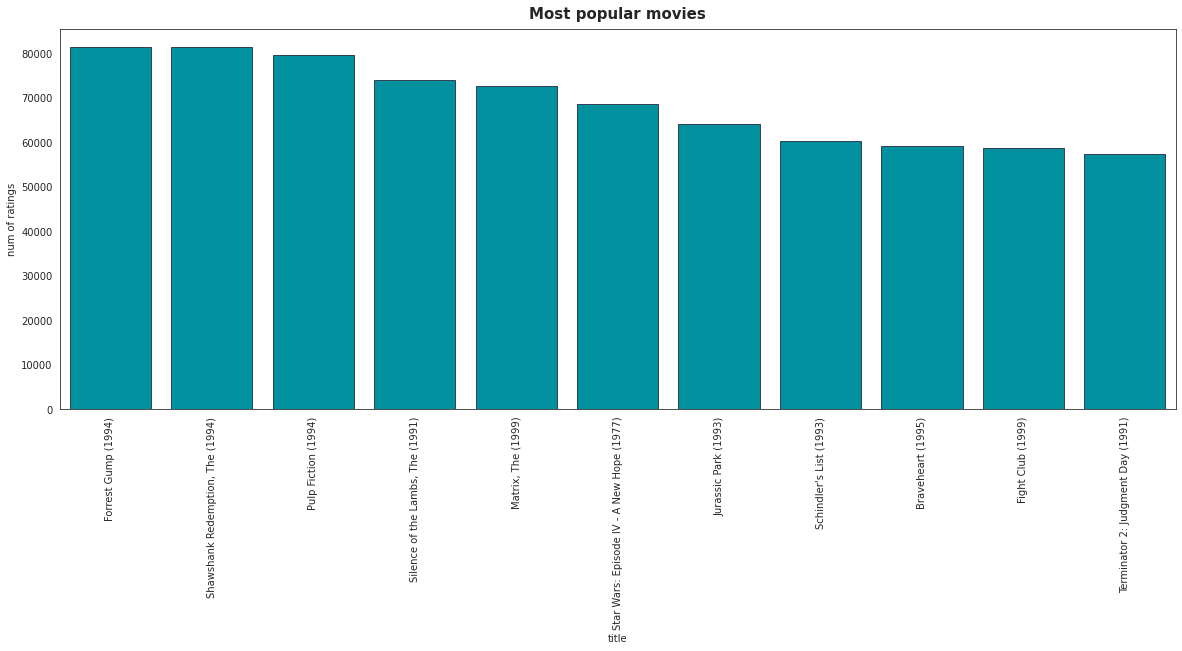

In [41]:
most_popular=ratings.sort_values(by='num of ratings',ascending=False).head(11).reset_index()
plt.figure(figsize=(20,7))
sns.barplot(x='title',y='num of ratings',data=most_popular,facecolor='#00909E',edgecolor='#334257')
plt.xticks(rotation="vertical")
plt.title('Most popular movies',fontsize= 15,pad=10,fontweight="bold")
plt.savefig("year.png")
files.download('year.png')

Top 10 Movie titles based on User rate

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

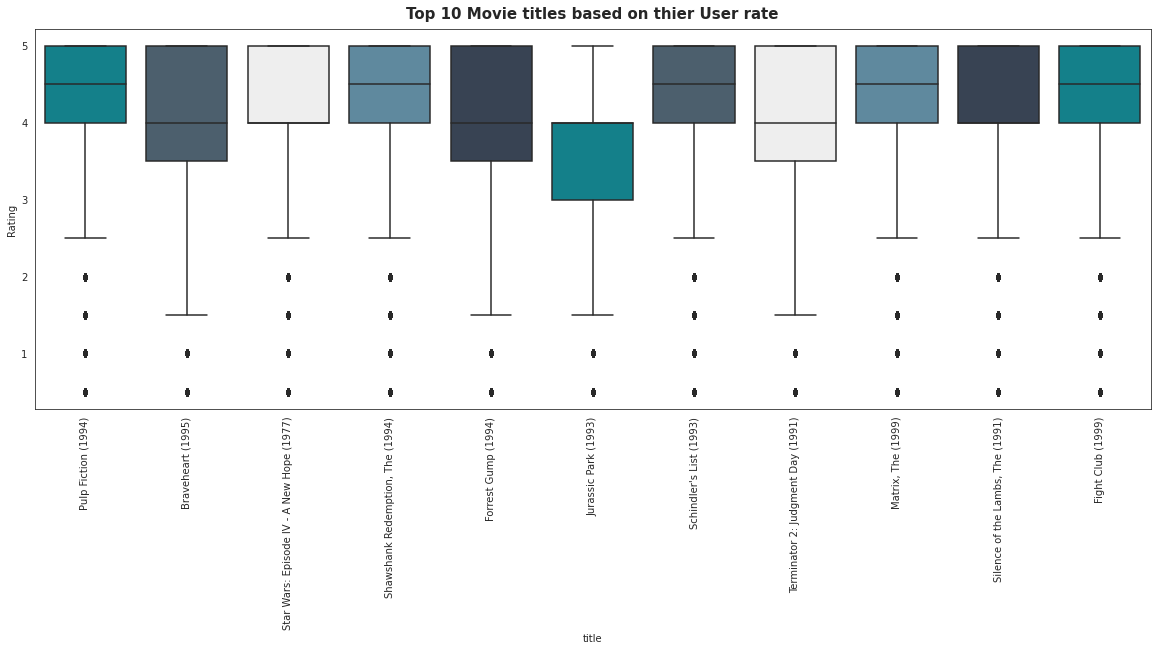

In [50]:
most_popular_title=most_popular['title'].to_list()
df_popular=df[df['title'].isin(most_popular_title)]
plt.figure(figsize=(20,7))
sns.boxplot(x="title", y="rating", data=df_popular,palette=movies_colors)
plt.xticks(rotation="vertical")
plt.ylabel("Rating")
plt.title('Top 10 Movie titles based on thier User rate',fontsize= 15,pad=10,fontweight="bold")
plt.savefig("popular.png")
files.download('popular.png')